In [1]:
import warnings
warnings.filterwarnings('ignore')

Try standard scaler too

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.drop(["Id"], axis=1, inplace=True)

In [5]:
house_df.shape

(1460, 80)

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Drop columns with null values > 40%

In [7]:
threshold = .4

drop_cols = house_df.columns[ (house_df.isna().sum() / house_df.shape[0]) > threshold ]
drop_cols

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
house_df.drop(drop_cols, axis=1, inplace=True)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Drop Rows with any null value

In [9]:
house_df.dropna(axis=0, how='any', inplace=True)
#house_df.isna().sum().sum()

In [10]:
house_df.shape

(1094, 75)

In [11]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [12]:
non_num_cols = house_df.dtypes[house_df.dtypes == 'object'].index
non_num_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
num_cols = house_df.dtypes[(house_df.dtypes == "int64") | (house_df.dtypes == "float64")].index
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
house_df.isna().sum().sum()

0

EDA

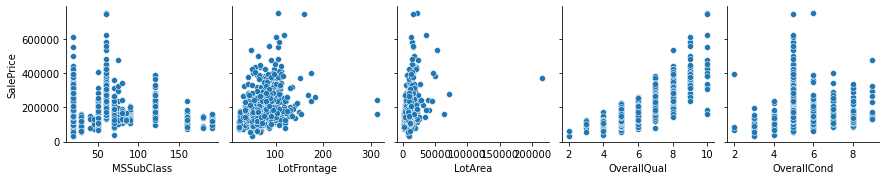

In [15]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[0:5])
plt.show()

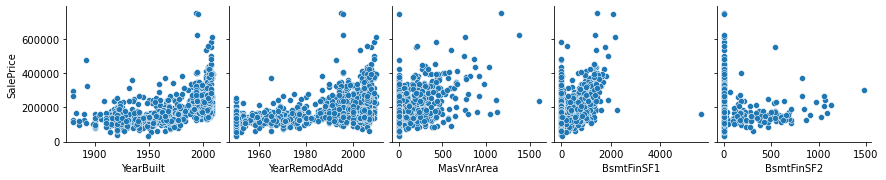

In [16]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[5:10])
plt.show()

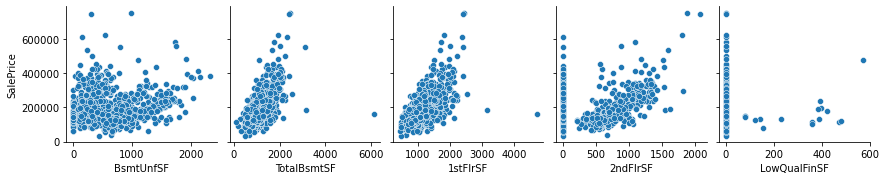

In [17]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[10:15])
plt.show()

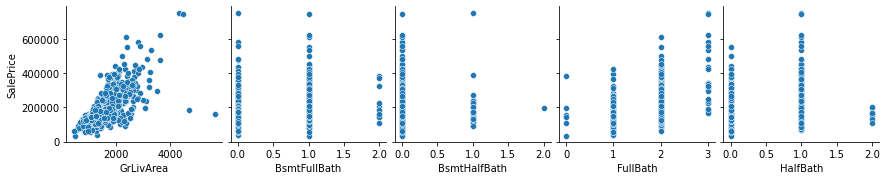

In [18]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[15:20])
plt.show()

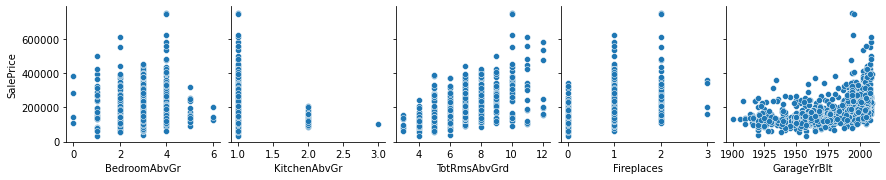

In [19]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[20:25])
plt.show()

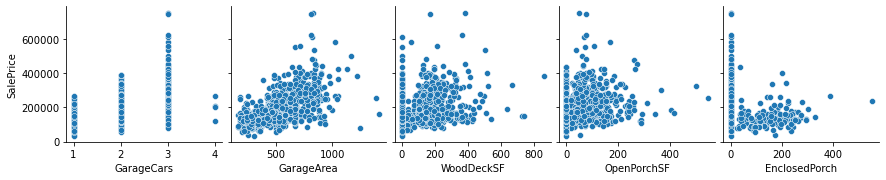

In [20]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[25:30])
plt.show()

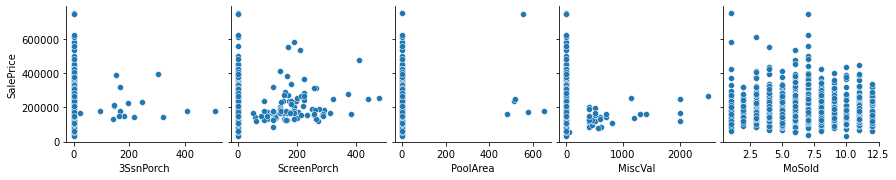

In [21]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[30:35])
plt.show()

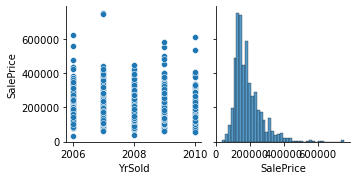

In [22]:
sns.pairplot(data=house_df, y_vars=["SalePrice"], x_vars=num_cols[35:40])
plt.show()

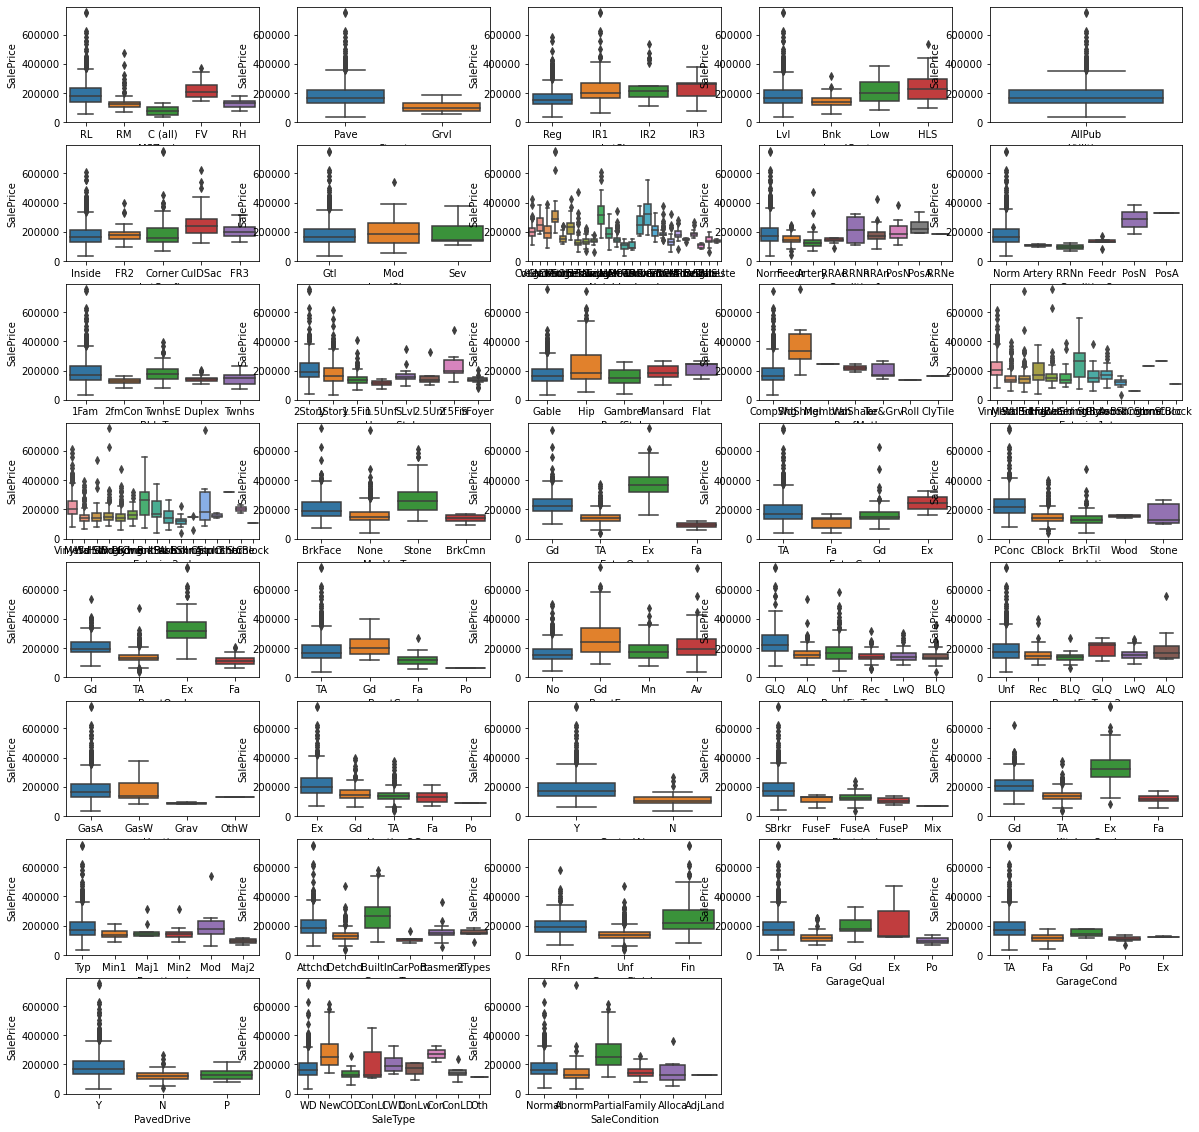

In [23]:
plt.figure(figsize=(20, 20))

for i in range(0,len(non_num_cols)):
    plt.subplot(8,5,i+1)
    sns.boxplot(x = non_num_cols[i], y = 'SalePrice', data = house_df)
plt.show()

Get dummies

In [24]:
cat_cols = non_num_cols.tolist() + ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold" ]

len(cat_cols)

51

In [25]:
dummies_df = pd.get_dummies(house_df[cat_cols])

df = pd.concat([house_df, dummies_df], axis=1)
df.drop(cat_cols, axis=1, inplace=True)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


Train test split

In [26]:
features = df.columns.drop("SalePrice")
target = "SalePrice"

In [27]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(765, 247)
(329, 247)


In [28]:
X_train = df_train[features]
y_train = df_train[[target]]

X_test = df_test[features]
y_test = df_test[[target]]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(765, 246) (765, 1)
(329, 246) (329, 1)


Scale

In [29]:
cont_cols = []
for col in num_cols:
    if col not in ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold" ]:
        cont_cols.append(col)

len(cont_cols)

24

In [30]:
X_train[cont_cols[:-1]].iloc[[0]]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
290,120.0,15611,2006,2006,0.0,0,0,1079,1079,1079,...,2006.0,685,0,51,0,0,0,0,0,2006


In [31]:
scalerX, scalerY = MinMaxScaler(), MinMaxScaler()
#scaler = StandardScaler()

X_train[cont_cols[:-1]] = scalerX.fit_transform(X_train[cont_cols[:-1]])
X_train[cont_cols[:-1]].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,...,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.174752,0.041673,0.712207,0.598105,0.078660,0.079310,0.034785,0.259457,0.166526,0.174573,...,0.682863,0.274237,0.125426,0.087551,0.072368,0.006479,0.036879,0.004557,0.008802,0.453922
std,0.086750,0.041405,0.236517,0.349191,0.131917,0.083904,0.115273,0.190669,0.070371,0.091066,...,0.257779,0.152731,0.159077,0.120846,0.198788,0.058812,0.123761,0.063251,0.063039,0.333921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.030382,0.569231,0.283333,0.000000,0.000000,0.000000,0.115582,0.119400,0.107193,...,0.500000,0.166932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,0.167808,0.038753,0.723077,0.750000,0.000000,0.068746,0.000000,0.217466,0.153372,0.156794,...,0.700000,0.257552,0.000000,0.053016,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.208904,0.047250,0.946154,0.916667,0.124093,0.124734,0.000000,0.362158,0.207327,0.229431,...,0.930000,0.340223,0.230769,0.126143,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X_train[cont_cols[:-1]].iloc[[0]]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
290,0.339041,0.066891,0.969231,0.933333,0.0,0.0,0.0,0.461901,0.162198,0.150682,...,0.96,0.417329,0.0,0.093236,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#y_train = scalerY.fit_transform(y_train).reshape(-1)
y_train[:5]

,SalePrice
290,233230
546,210000
891,172500
1393,163000
605,205000


In [34]:
X_test[cont_cols[:-1]].iloc[[0]]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
202,50.0,7000,1924,1950,0.0,617,0,0,617,865,...,1924.0,398,0,0,126,0,0,0,0,2006


In [35]:
X_test[cont_cols[:-1]] = scalerX.transform(X_test[cont_cols[:-1]])
X_test[cont_cols[:-1]].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,...,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.160314,0.040377,0.707739,0.599747,0.082188,0.079645,0.021202,0.259493,0.163521,0.169239,...,0.692158,0.270988,0.139275,0.081817,0.082005,0.006318,0.028540,0.004836,0.010857,0.429331
std,0.076164,0.030255,0.247994,0.348571,0.152492,0.081150,0.087924,0.191574,0.066631,0.091317,...,0.263230,0.153273,0.188328,0.112938,0.234604,0.057445,0.117028,0.061932,0.075063,0.332647
min,0.000000,0.001384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026478,0.009873,...,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109589,0.027577,0.553846,0.300000,0.000000,0.000000,0.000000,0.117295,0.116403,0.103667,...,0.500000,0.141494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,0.157534,0.036551,0.738462,0.750000,0.000000,0.066265,0.000000,0.238014,0.147710,0.152327,...,0.780000,0.257552,0.000000,0.042048,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.202055,0.046498,0.946154,0.900000,0.127721,0.129695,0.000000,0.362158,0.201665,0.226610,...,0.930000,0.363275,0.247253,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
max,0.523973,0.324668,0.992308,1.000000,1.161103,0.400425,0.721167,0.921661,0.505079,0.634697,...,0.990000,0.709062,1.177198,0.742230,1.883959,0.801181,0.916667,0.800926,0.800000,1.000000


In [36]:
X_test[cont_cols[:-1]].iloc[[0]]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
202,0.099315,0.026642,0.338462,0.0,0.0,0.10932,0.0,0.0,0.085262,0.100376,...,0.14,0.189189,0.0,0.0,0.430034,0.0,0.0,0.0,0.0,0.0


In [37]:
#y_test = scalerY.transform(y_test).reshape(-1)
y_test[:5]

,SalePrice
202,112000
1125,115000
219,167240
1333,125500
400,245500


LR

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

metrics = [[ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) ]
 ]

df_lr_metrics = pd.DataFrame(metrics, columns=["Train", "Test"], index=["R2_Score", "MSE", "RMSE"] )
print(df_lr_metrics)

metrics = [ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) 
        ]

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','MSE (Train)','MSE (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metrics
}
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

LinearRegression()

Ridge

In [42]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

print(model_cv.best_params_)

best_ridge_model = Ridge(alpha=model_cv.best_params_['alpha'])
best_ridge_model.fit(X_train, y_train)

y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

metrics = [[ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) ]
 ]

df_metrics = pd.DataFrame(metrics, columns=["Train", "Test"], index=["R2_Score", "MSE", "RMSE"] )
print(df_metrics)

metrics = [ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) 
        ]

rg_metric = pd.Series(metrics, name = 'Ridge Regression')

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Lasso

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

model_cv.best_params_

best_lasso_model = Lasso(alpha=model_cv.best_params_["alpha"])
best_lasso_model.fit(X_train, y_train)

y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)

metrics = [[ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) ]
 ]

df_lasso_metrics = pd.DataFrame(metrics, columns=["Train", "Test"], index=["R2_Score", "MSE", "RMSE"] )
print(df_lasso_metrics)

metrics = [ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) 
        ]

ls_metric = pd.Series(metrics, name = 'Lasso Regression')

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Residual analysis

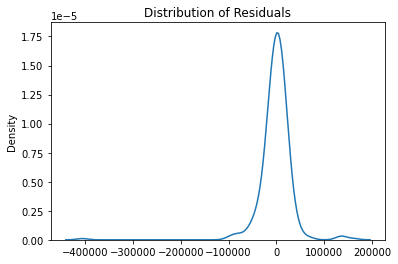

In [56]:
errors = (y_test.values.reshape(-1) - y_test_pred)

fig = plt.figure()
sns.kdeplot(errors)
plt.title("Distribution of Residuals")

plt.show()

Text(0.5, 1.0, 'y_pred vs Residuals')

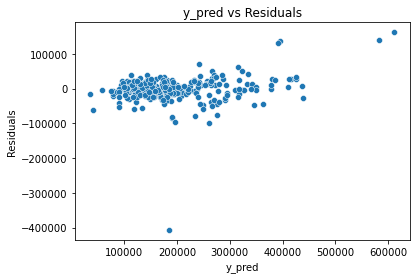

In [57]:
sns.scatterplot(y_test.values.reshape(-1), errors)
plt.xlabel("y_pred")
plt.ylabel("Residuals")
plt.title("y_pred vs Residuals")

Compare Metrics

In [58]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.94595,0.94376,0.92466
1,R2 Score (Test),-2513021838254185984.00000,0.77638,0.81711
2,MSE (Train),370855930.61176,385852305.76520,516916326.84291
3,MSE (Test),17651214863345913654327377920.00000,1570677822.55804,1284578140.82182
4,RMSE (Train),19257.62007,19643.12363,22735.79396
5,RMSE (Test),132857874675707.17188,39631.77794,35841.01199


Compare coefficients

In [59]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas["LR"] = lr_model.coef_.reshape(-1)
betas['Ridge'] = best_ridge_model.coef_.reshape(-1)
betas['Lasso'] = best_lasso_model.coef_.reshape(-1)

betas.head()

,LR,Ridge,Lasso
LotFrontage,31561.24223,23707.17107,0.00000
LotArea,217730.29704,175685.29539,73636.88114
YearBuilt,36669.94093,29480.02640,17881.98658
YearRemodAdd,19739.26799,17546.35362,14312.11080
MasVnrArea,45238.63585,42190.31055,21827.11790


In [60]:
pd.set_option('display.max_rows', None)
np.abs(betas).sort_values(by="Lasso", ascending=False)

,LR,Ridge,Lasso
RoofMatl_ClyTile,1149388793215105.00000,513240.59732,473650.96449
GrLivArea,3239835509895071.00000,143568.23549,366761.77230
LotArea,217730.29704,175685.29539,73636.88114
RoofMatl_WdShngl,1149388792363647.25000,160180.50791,62181.60405
Neighborhood_NoRidge,196445779172091.43750,30942.23457,49180.26793
Neighborhood_StoneBr,196445779195083.40625,48733.33507,46295.00461
BsmtFinSF1,47710130486327.28906,105166.68213,36882.61451
PoolArea,86948.50635,68243.48713,35116.88331
BsmtQual_Ex,2057554877097848.25000,18080.16074,32136.30703
KitchenQual_Ex,302551641415799.31250,18953.52320,30299.91915


In [61]:
(betas['LR'] == 0).sum()

2

In [62]:
(betas['Ridge'] == 0).sum()

7

In [63]:
(betas['Lasso'] == 0).sum()

146

In [64]:
(betas['Lasso'] != 0 ).sum()

100

In [65]:
betas[betas['Lasso'] > 0.001]

,LR,Ridge,Lasso
LotArea,217730.29704,175685.29539,73636.88114
YearBuilt,36669.94093,29480.02640,17881.98658
YearRemodAdd,19739.26799,17546.35362,14312.11080
MasVnrArea,45238.63585,42190.31055,21827.11790
BsmtFinSF1,47710130486327.28906,105166.68213,36882.61451
TotalBsmtSF,-50761752609053.58594,107165.73107,23217.55584
2ndFlrSF,-1285599601647709.00000,127928.75525,10523.83095
GrLivArea,3239835509895071.00000,143568.23549,366761.77230
GarageArea,19325.52148,23433.00481,23084.13354
WoodDeckSF,13477.62207,14441.50274,10064.18202


Repeat with logged Y values

In [115]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [116]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

metrics = [[ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) ]
 ]

df_lr_metrics = pd.DataFrame(metrics, columns=["Train", "Test"], index=["R2_Score", "MSE", "RMSE"] )
print(df_lr_metrics)

metrics = [ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) 
        ]

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','MSE (Train)','MSE (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metrics
}
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

           Train                        Test
R2_Score 0.94962 -53690884232152653824.00000
MSE      0.00760   8977265891925607424.00000
RMSE     0.08717            2996208586.18448


In [117]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

print(model_cv.best_params_)

best_ridge_model = Ridge(alpha=model_cv.best_params_['alpha'])
best_ridge_model.fit(X_train, y_train)

y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

metrics = [[ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) ]
 ]

df_metrics = pd.DataFrame(metrics, columns=["Train", "Test"], index=["R2_Score", "MSE", "RMSE"] )
print(df_metrics)

metrics = [ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) 
        ]

rg_metric = pd.Series(metrics, name = 'Ridge Regression')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.01}
           Train    Test
R2_Score 0.94959 0.81756
MSE      0.00760 0.03050
RMSE     0.08720 0.17465


In [119]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.94962,0.94959,0.94643
1,R2 Score (Test),-53690884232152653824.00000,0.81756,0.84121
2,MSE (Train),0.00760,0.00760,0.00808
3,MSE (Test),8977265891925607424.00000,0.03050,0.02655
4,RMSE (Train),0.08717,0.08720,0.08989
5,RMSE (Test),2996208586.18448,0.17465,0.16294


Check test scale fit
try other scalers
error residuals plotting

In [118]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

model_cv.best_params_

best_lasso_model = Lasso(alpha=model_cv.best_params_["alpha"])
best_lasso_model.fit(X_train, y_train)

y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)

metrics = [[ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
            [ mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) ]
 ]

df_lasso_metrics = pd.DataFrame(metrics, columns=["Train", "Test"], index=["R2_Score", "MSE", "RMSE"] )
print(df_lasso_metrics)

metrics = [ r2_score(y_train, y_train_pred),  r2_score(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred),
            mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False) 
        ]

ls_metric = pd.Series(metrics, name = 'Lasso Regression')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
           Train    Test
R2_Score 0.94643 0.84121
MSE      0.00808 0.02655
RMSE     0.08989 0.16294


Extra

for col in non_num_cols:
    print(house_df[col].value_counts())

Log of house prices

In [112]:
def plot_transformations(x,y,df):

    plt.figure(figsize=(30,7))

    plt.subplot(1,5,1)
    X = df[x]
    Y = df[y]
    sns.regplot(X,Y)
    plt.title(x + " vs " + y)

    plt.subplot(1,5,2)
    X = df[x] * df[x]
    Y = df[y]
    sns.regplot(X,Y)
    plt.title("Square of " + x + " vs " + y)

    plt.subplot(1,5,3)
    X = np.log(df[x])
    Y = house_df[y]
    sns.regplot(X,Y)
    plt.title("Log of " + x + " vs " + y)

    plt.subplot(1,5,4)
    X = np.sqrt(df[x])
    Y = house_df[y]
    sns.regplot(X,Y)
    plt.title("Sqrt of " + x + " vs " + y)

    plt.subplot(1,5,5)
    X = df[x]
    Y = np.log(house_df[y])
    sns.regplot(X,Y)
    plt.title(x + " vs " + "Log of " + y)

    plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

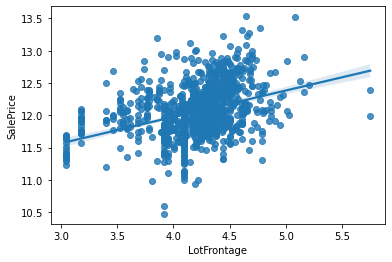

In [114]:
sns.regplot(np.log(house_df['LotFrontage']), np.log(house_df['SalePrice']))

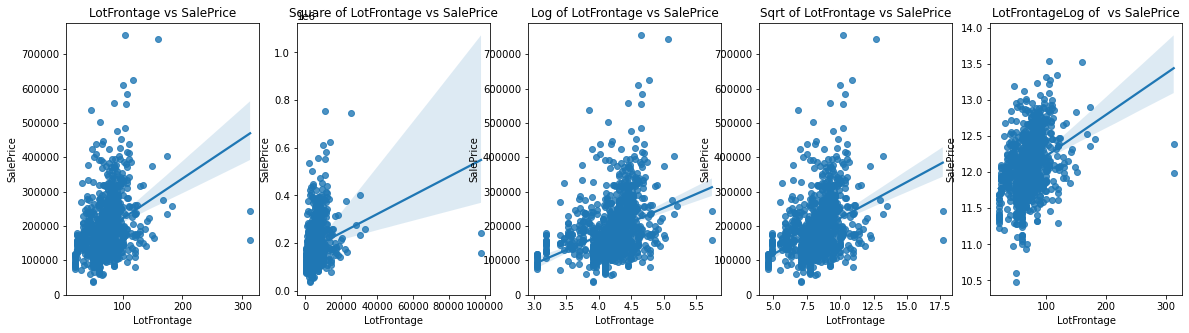

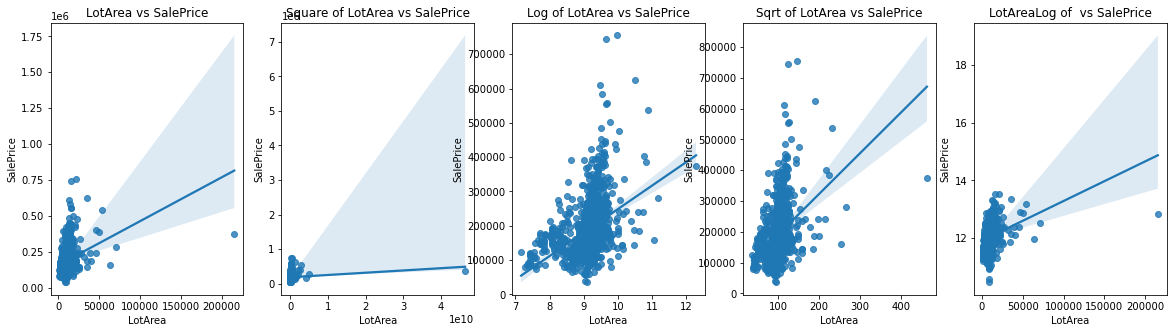

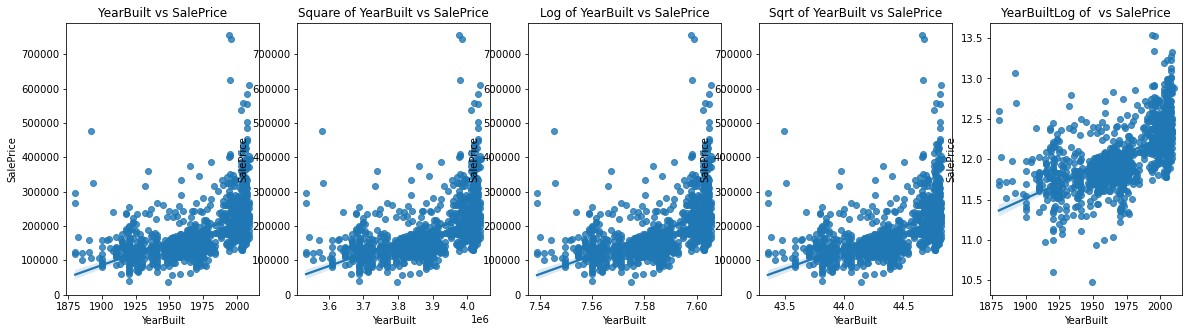

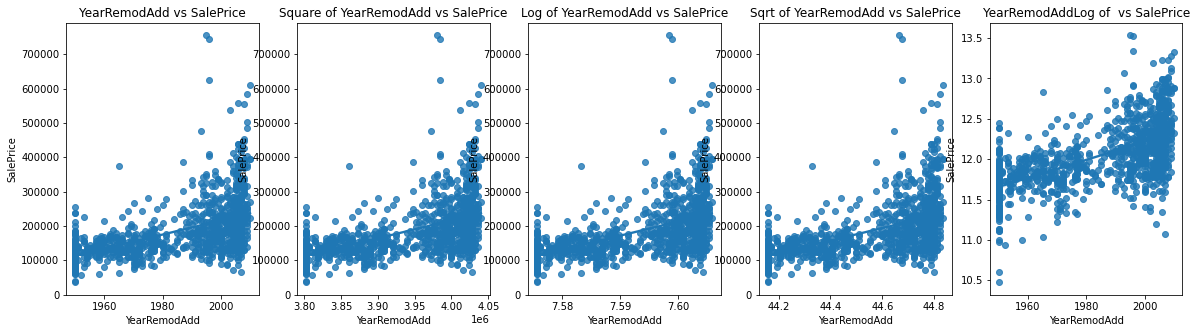

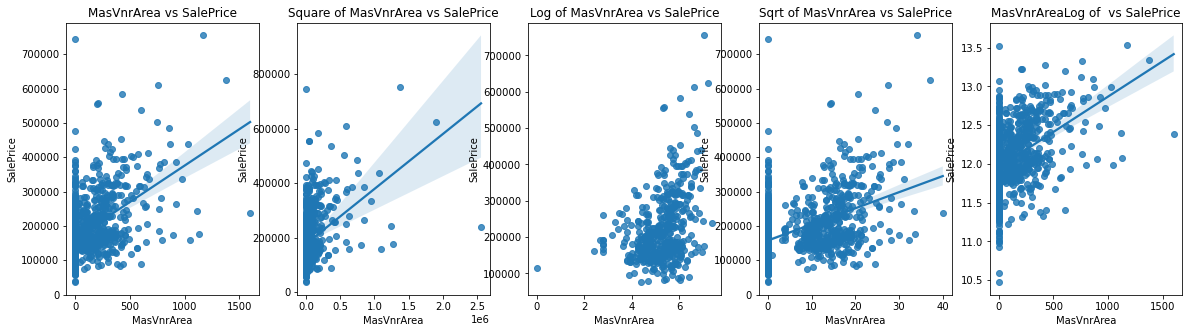

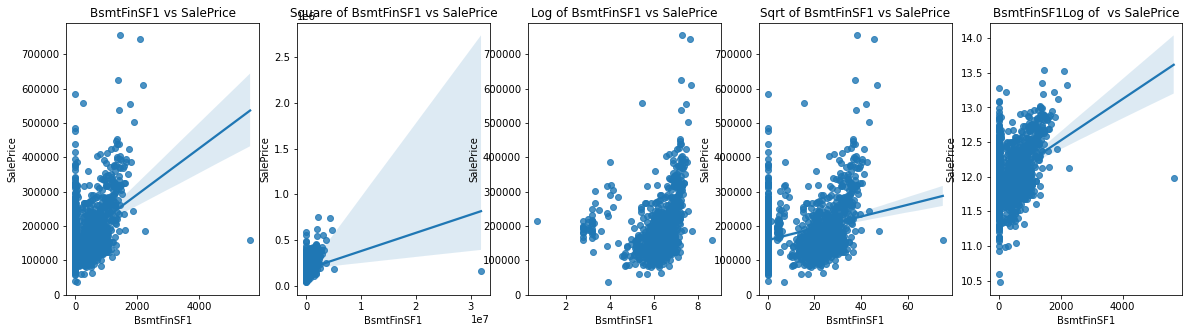

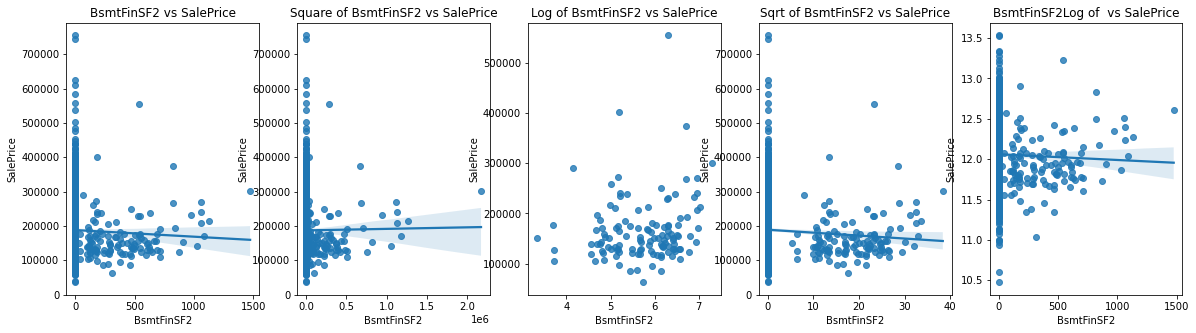

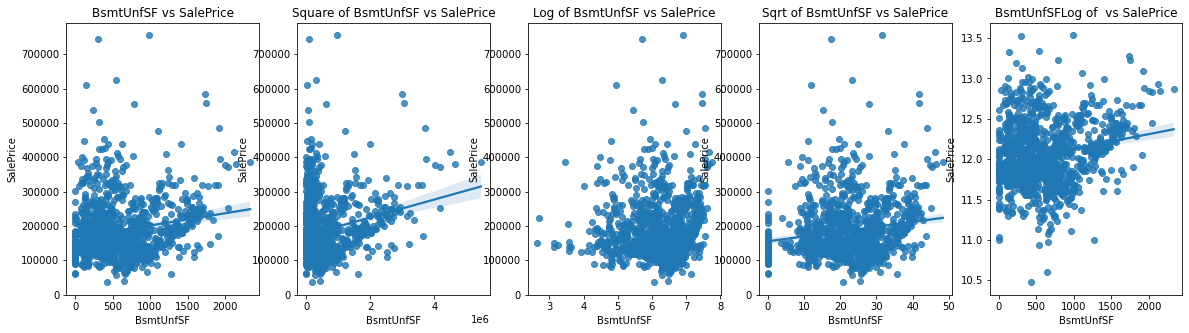

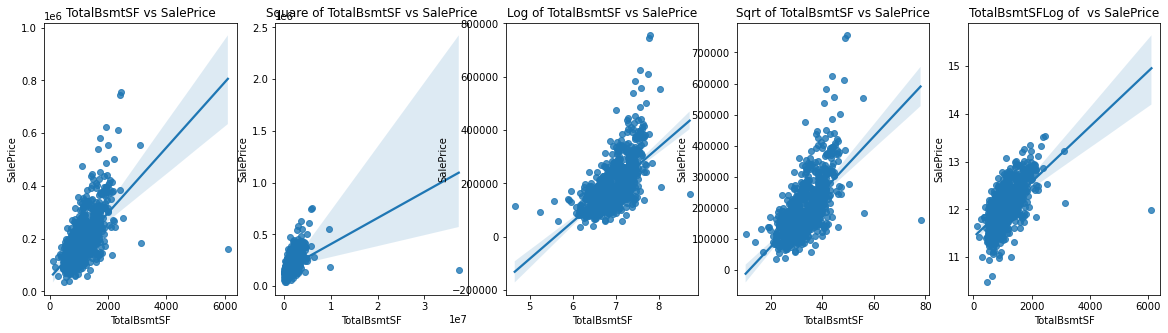

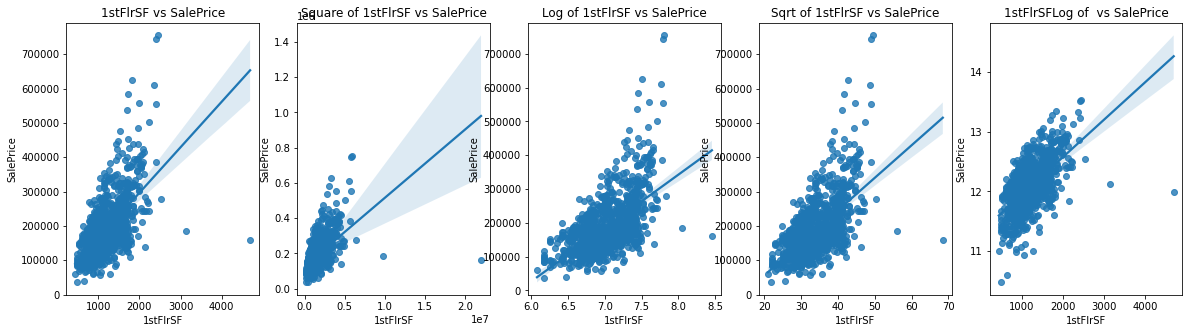

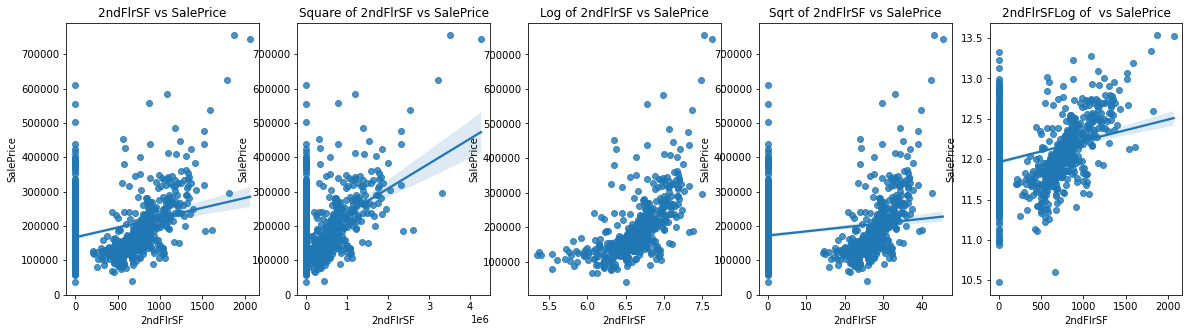

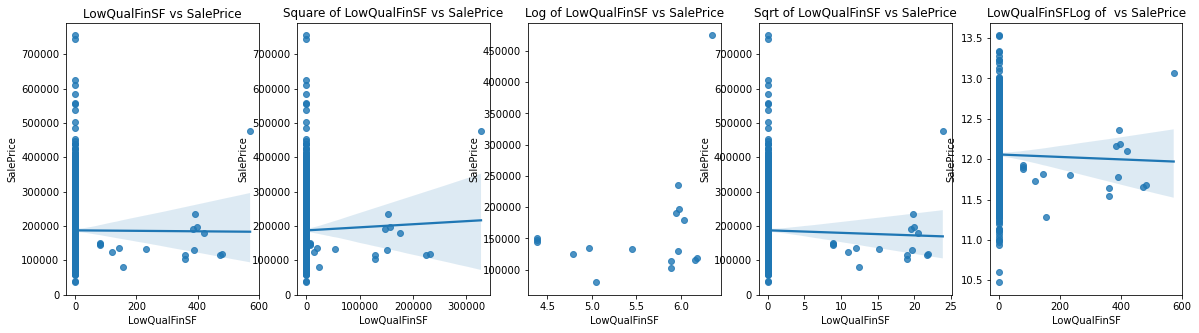

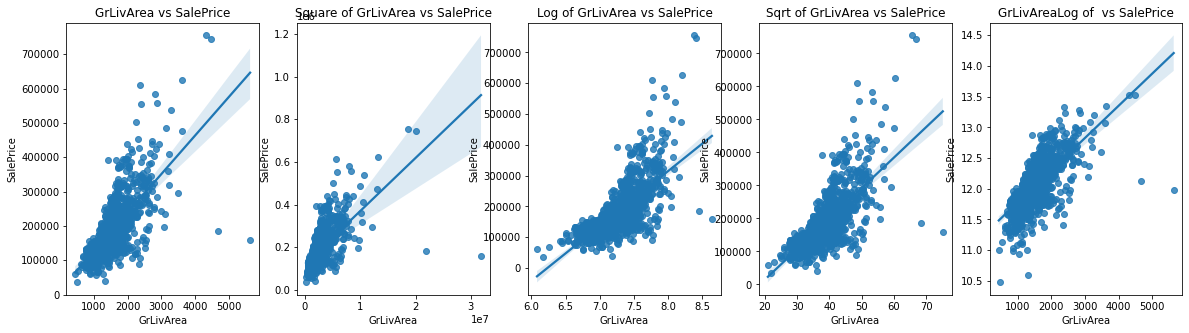

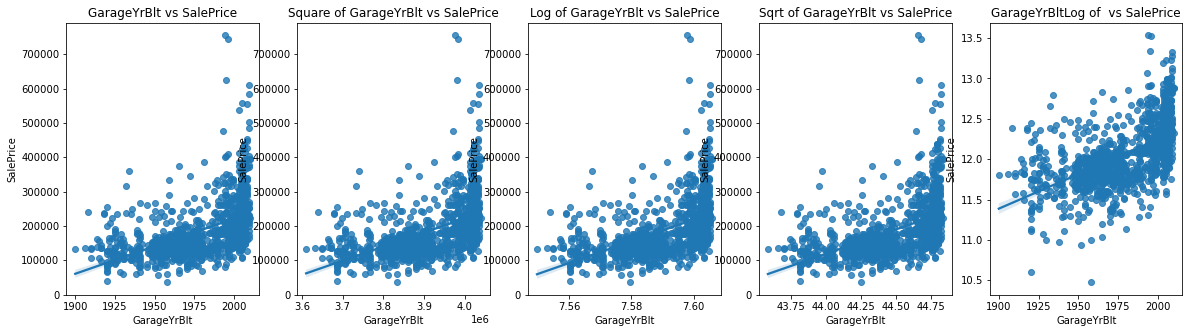

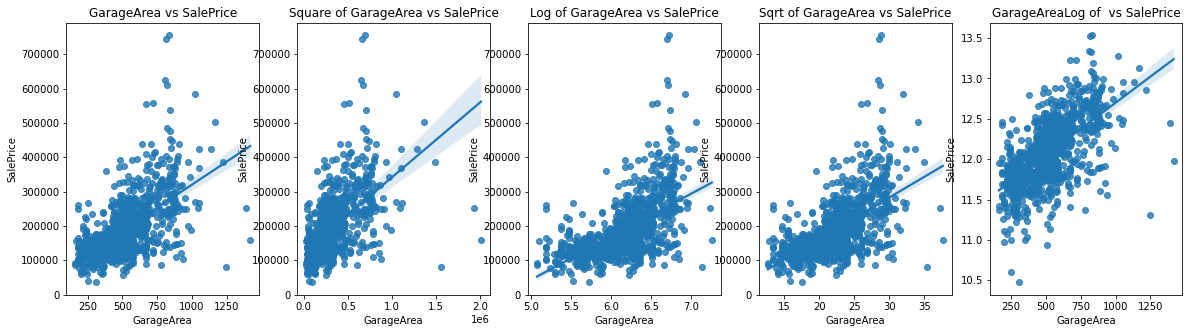

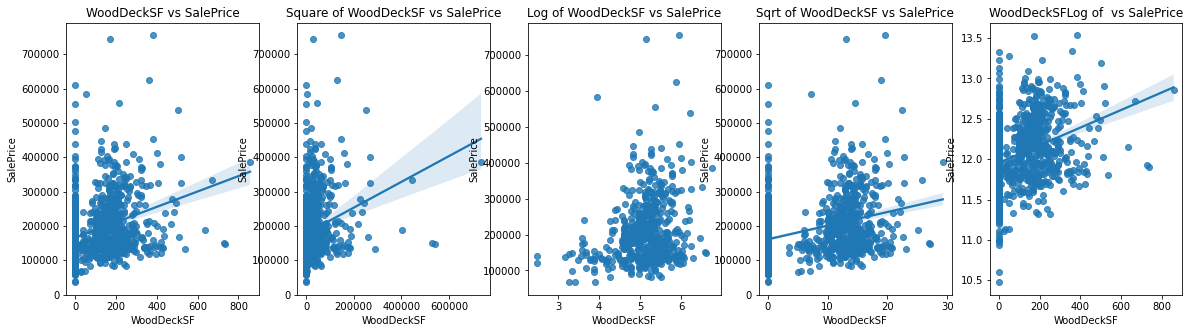

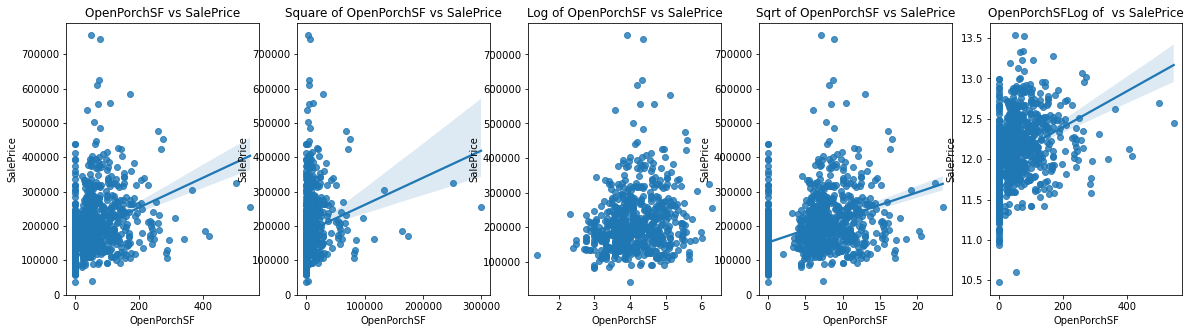

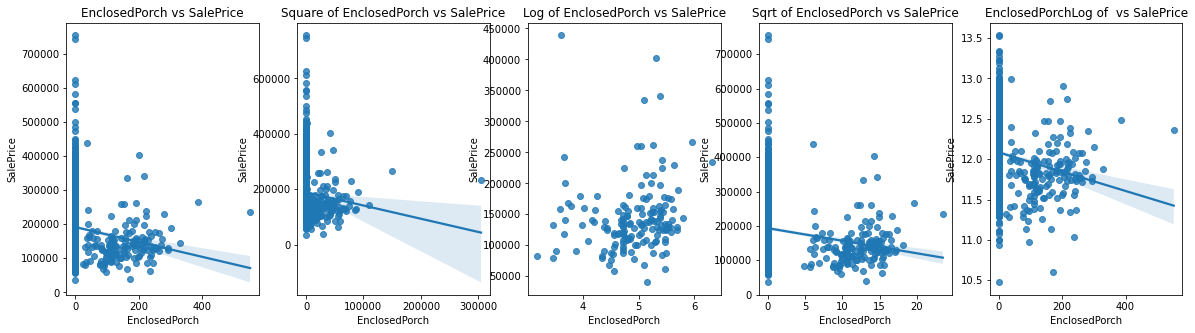

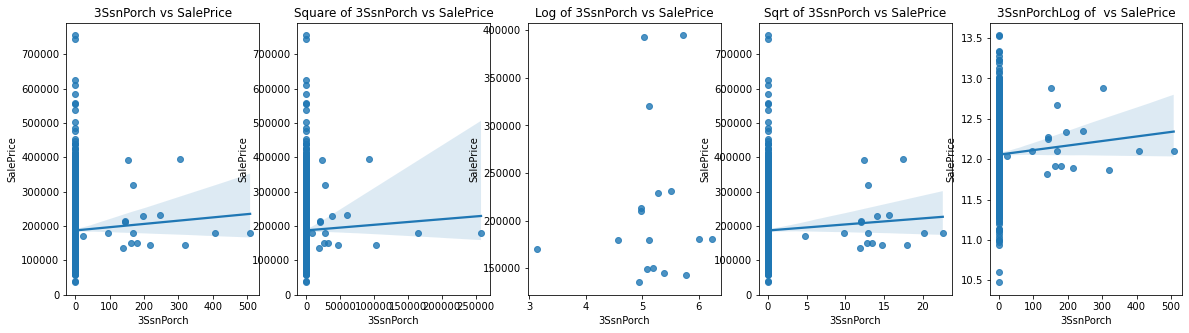

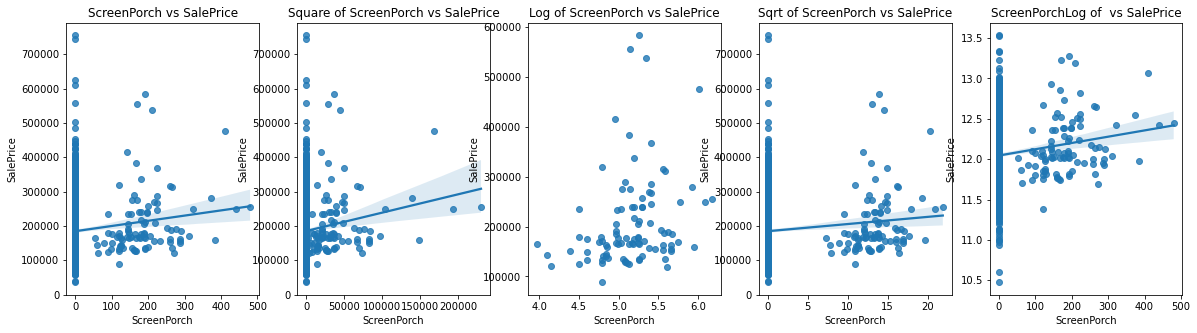

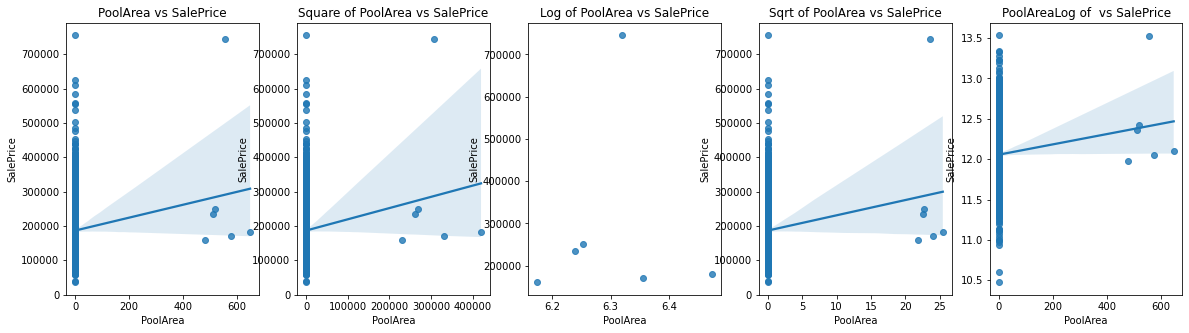

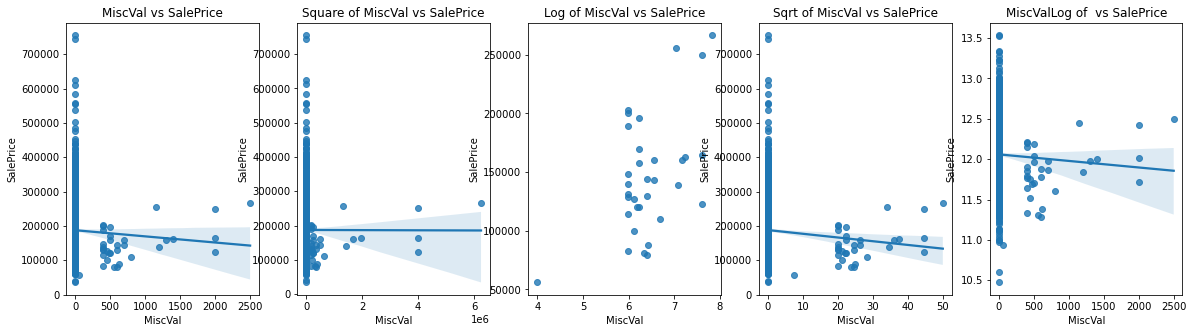

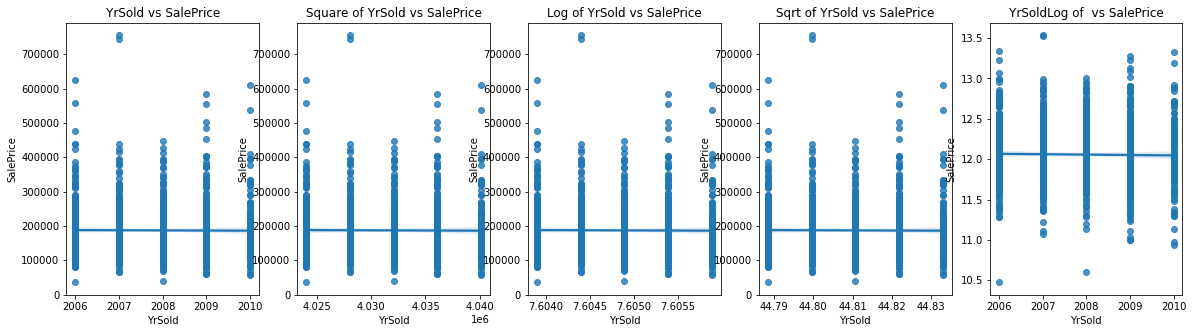

In [111]:
for col in cont_cols[:-1]:
    plot_transformations(col, "SalePrice", house_df)

In [109]:
def plot_y_transformations(x,y,df):

    plt.figure(figsize=(10,5))

    plt.subplot(1,1,1)
    X = df[x]
    Y = np.log(house_df[y])
    sns.regplot(X,Y)
    plt.title(x + "Log of " + " vs " + y)

    plt.show()

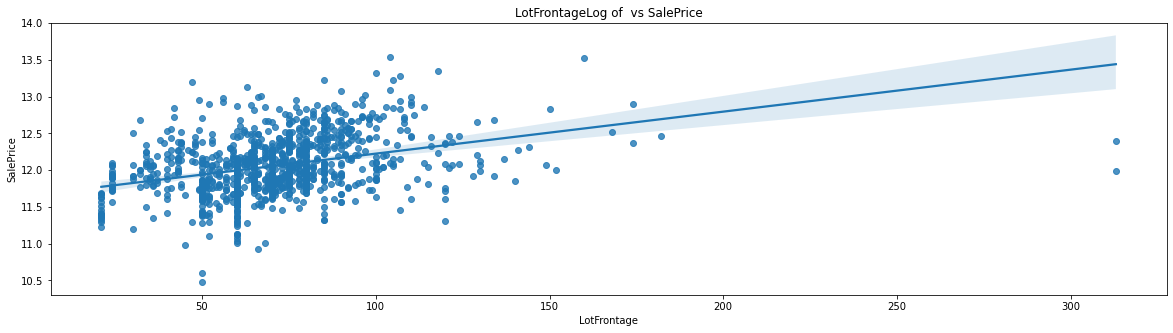

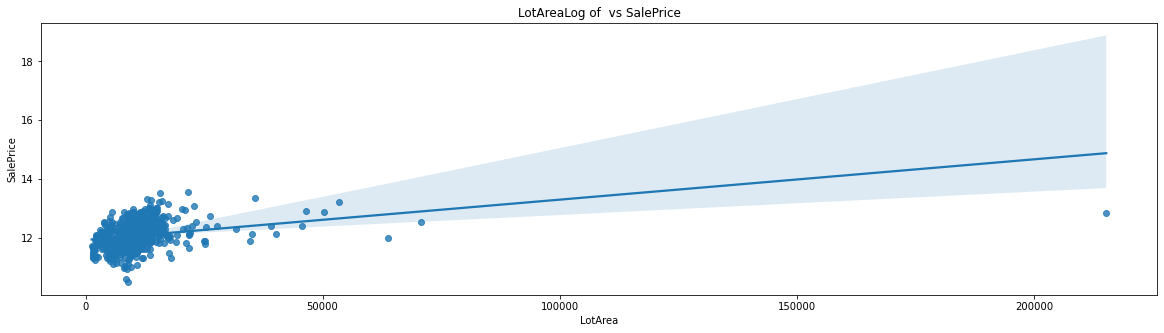

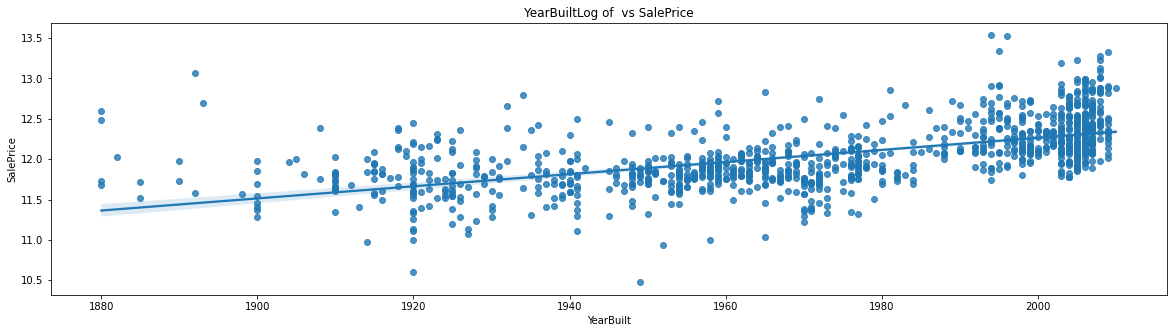

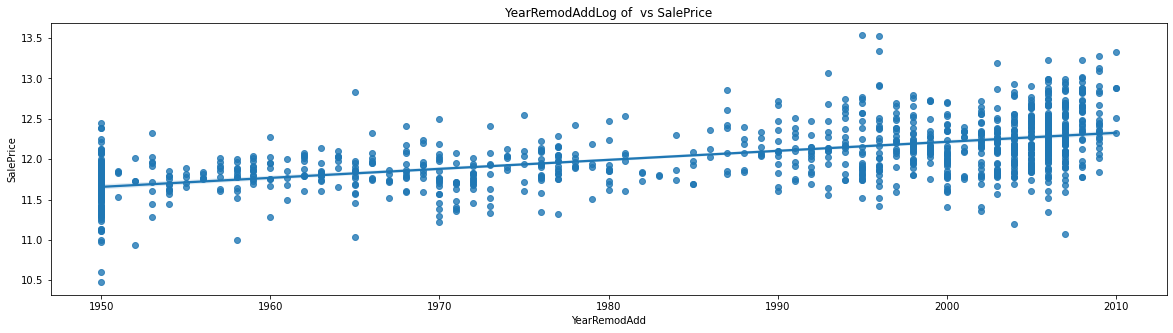

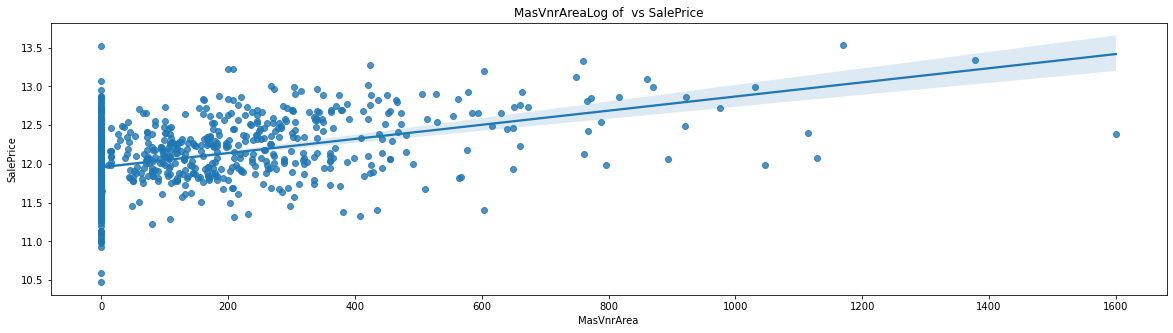

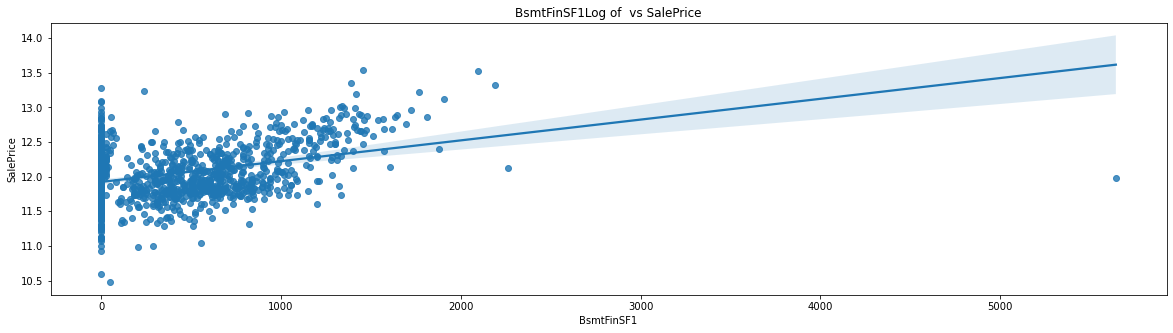

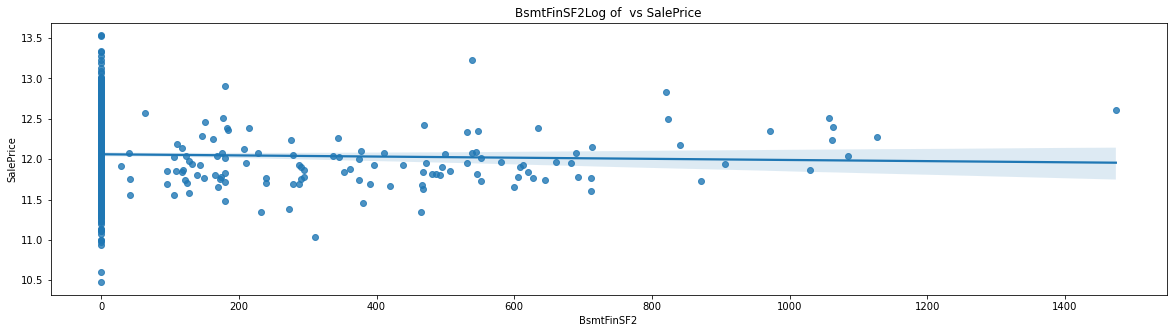

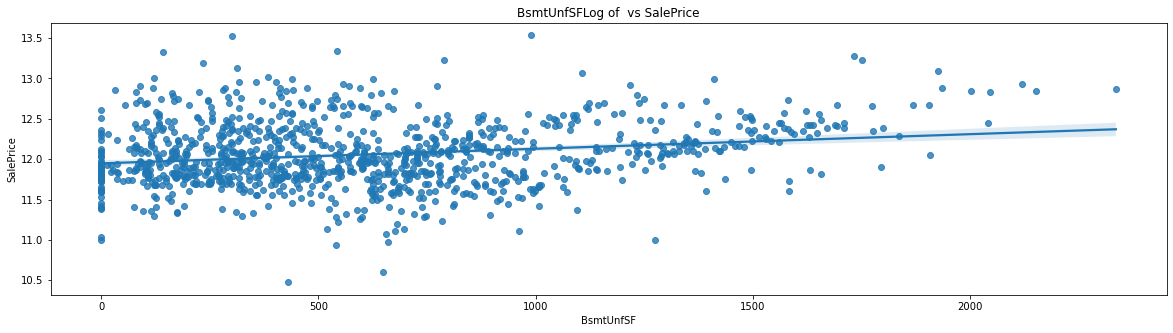

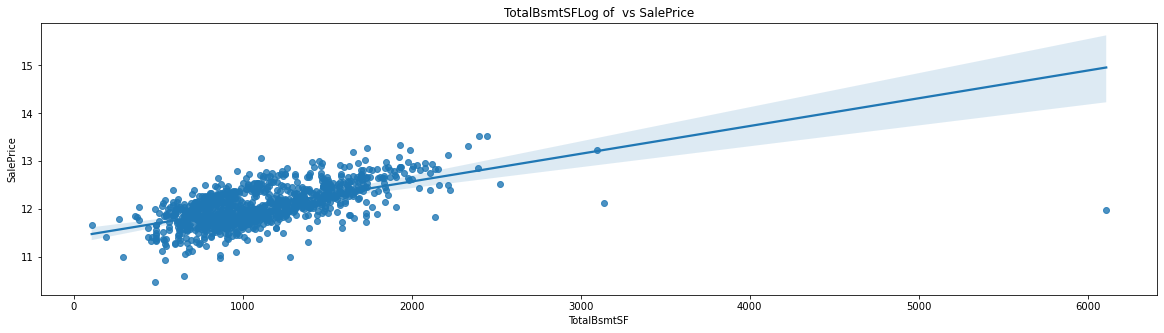

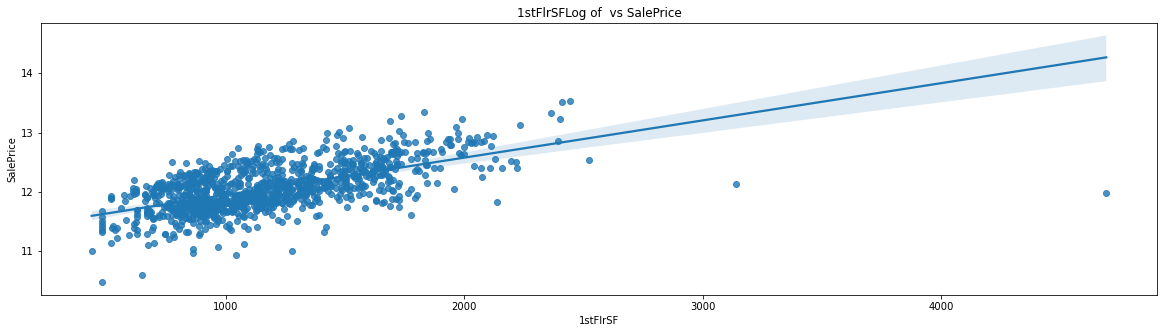

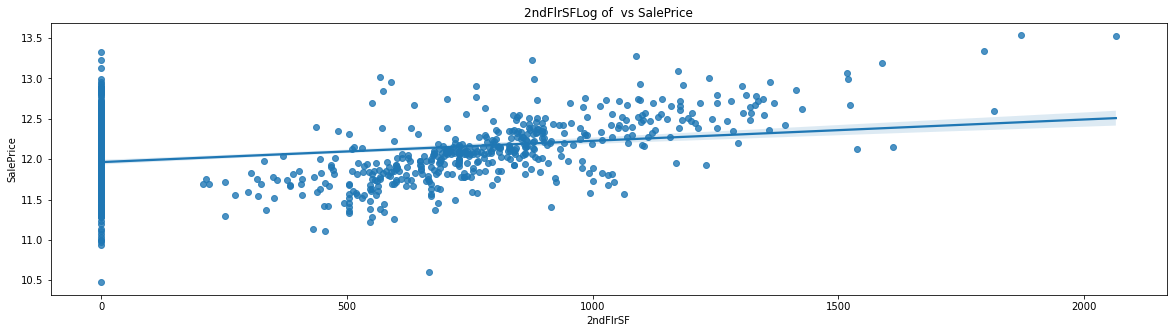

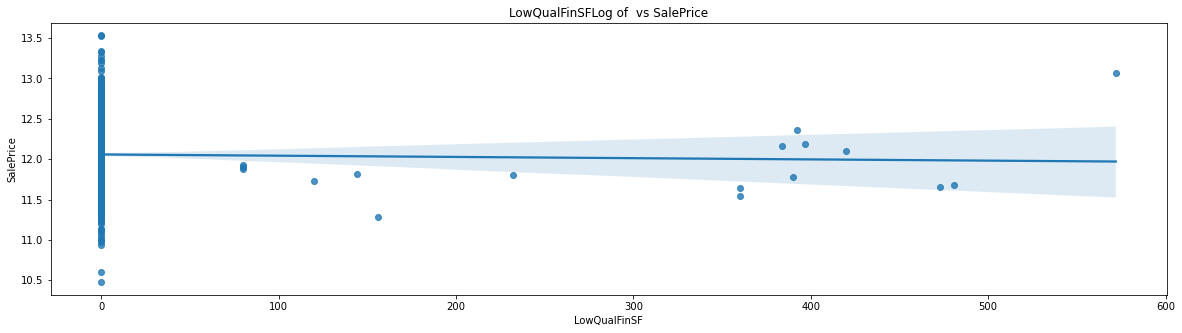

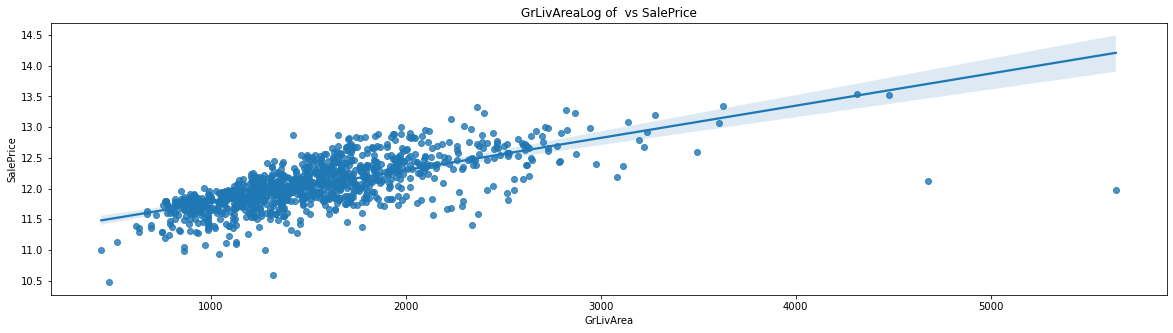

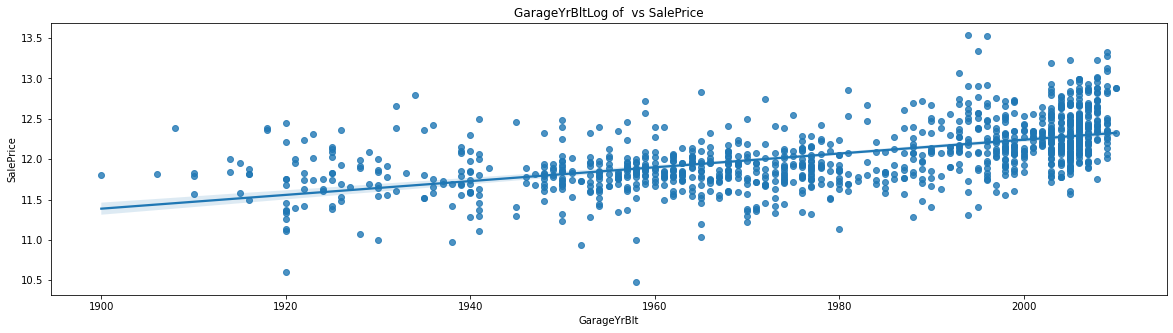

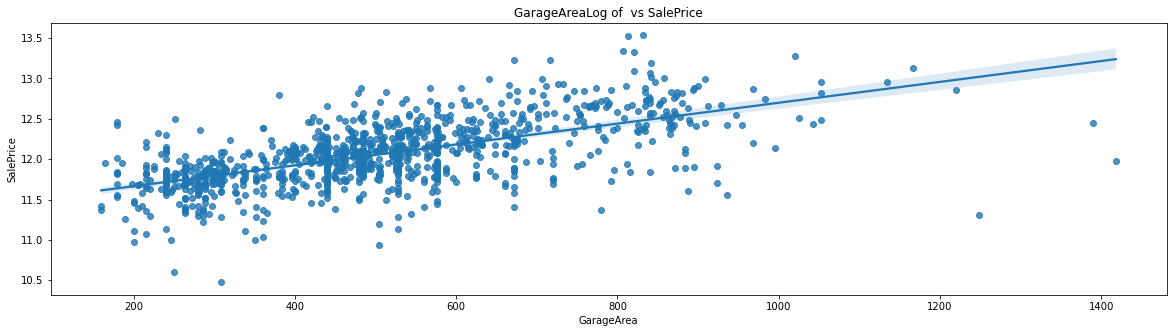

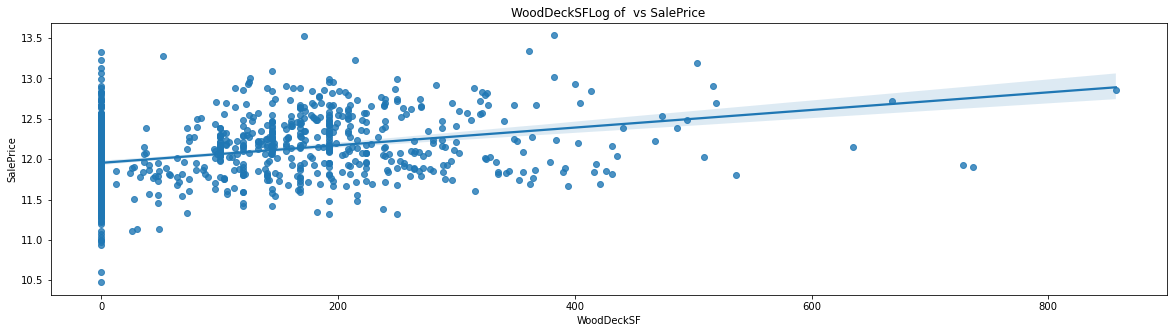

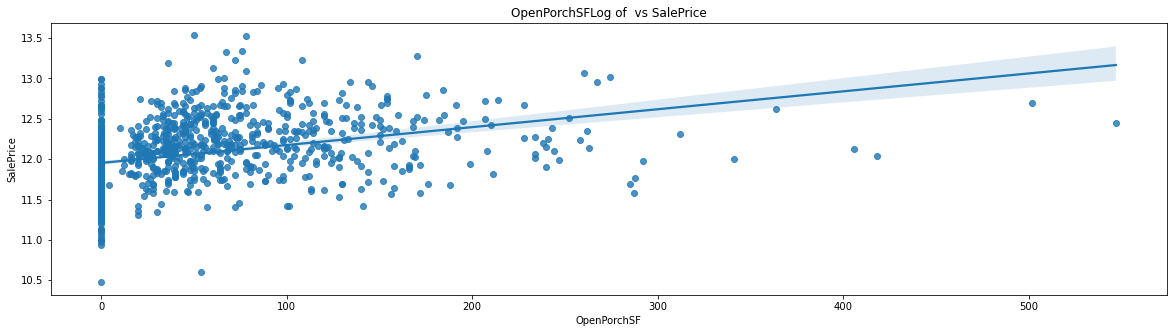

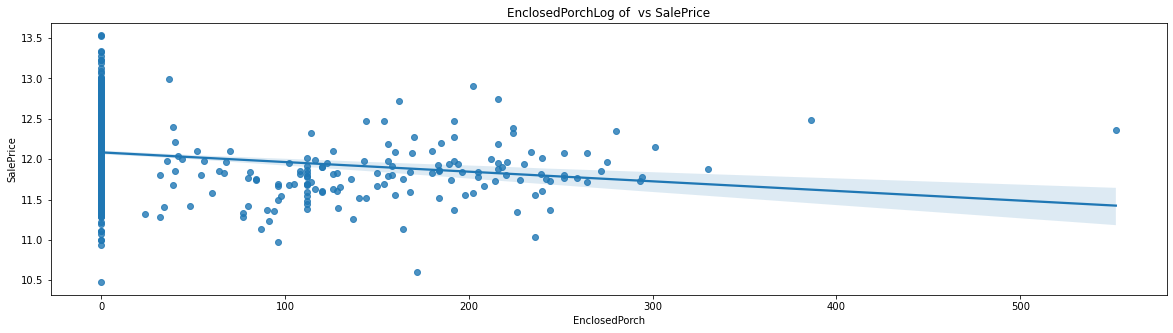

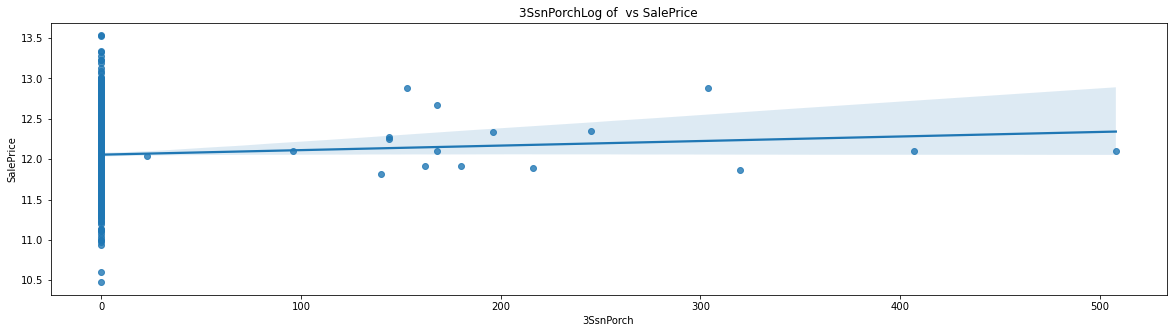

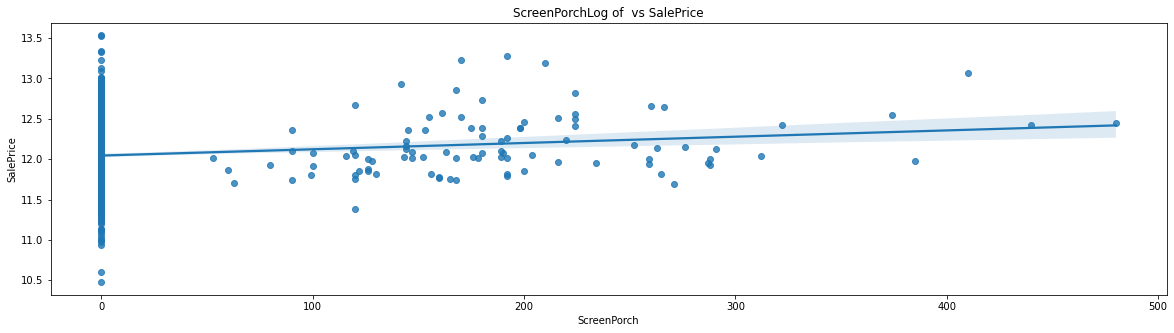

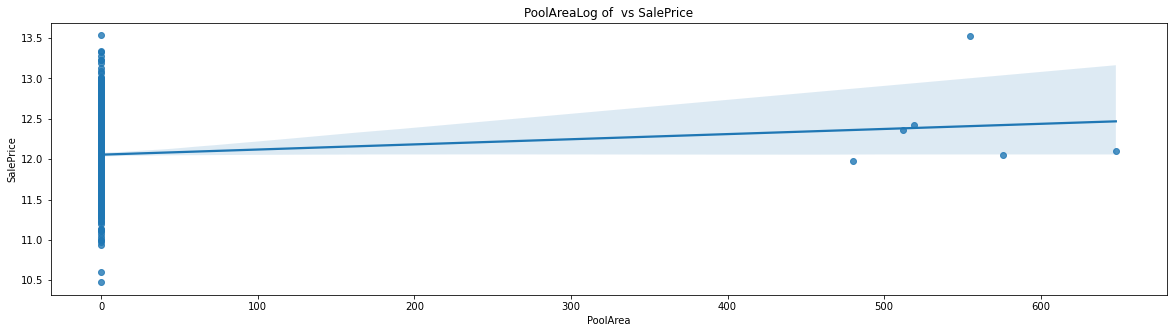

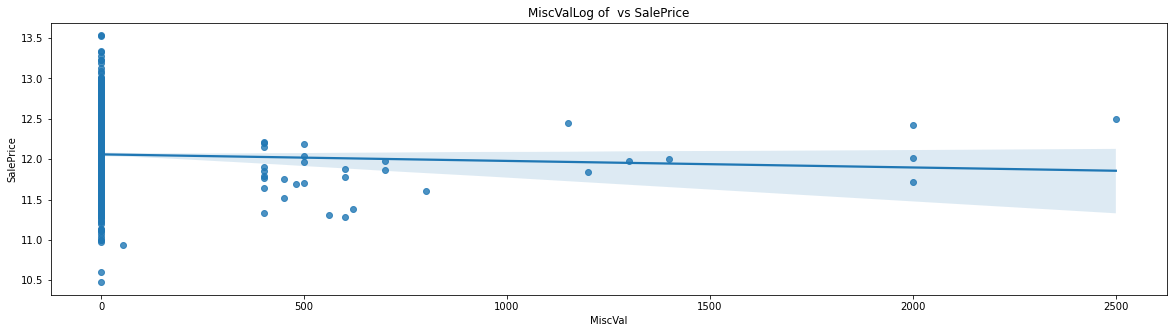

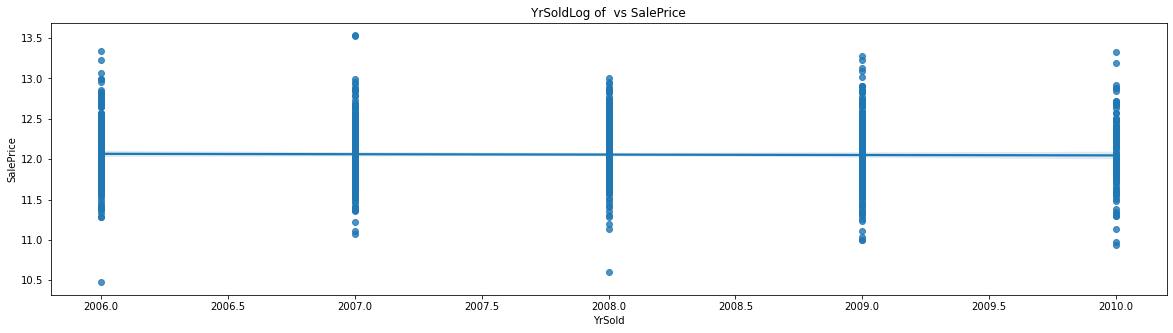

In [108]:
for col in cont_cols[:-1]:
    plot_y_transformations(col, "SalePrice", house_df)